# **Classification of Earthquakes Distribution on Active Faults in Sulawesi Island Using K-NN**
Created by : Nila Wildanul Husna

**List of Content**
1. Problem Understanding
1. Data Preparation
1. Modelling
1. Conclusion
1. Recommendation

***
# ***Problem Understanding & Data Understanding***

**Context**

*Sulawesi* merupakan wilayah Indonesia yang rawan terhadap gempa bumi tektonik karena secara geologis terletak pada pertemuan empat lempeng utama dunia yaitu lempeng Eurasia, lempeng Indo-Australia, lempeng Pasifik dan satu lempeng mikro yaitu lempeng Laut Filipina. Sulawesi juga seakan dibagi oleh berbagai patahan atau sesar (fault). Beberapa sesar yang aktif diantaranya Sesar Palu Koro, Sesar Matano, Sesar Saddang, Sesar Walanae, dan Sesar Lawanopo.

**Problem Statement**

Pada tanggal 28 September 2018 gempa bumi dan tsunami terjadi di wilayah Donggala dan Palu dengan magnitudo 7,4 SR menyebabkan peningkatan aktivitas sesar/patahan yang berada di wilayah Sulawesi dan mengakibatkan peningkatan gempa swarm secara signifikan yang terjadi di beberapa lokasi, seperti Mamasa, Pare-Pare, dan lokasi lainnya. Gempa swarm adalah sebuah peristiwa dimana suatu area lokal mengalami sekuens aktivitas gempa yang memiliki magnitudo kecil (M<5) tanpa adanya gempa kuat sebagai gempa utama dengan variasi durasi antara harian, minggu atau bulan. Baru-baru ini gempa bumi yang cukup signifikan terjadi di wilayah Mamuju, Sulawesi Barat dan sekitarnya pada tanggal 14 Januari 2021 pukul 14.35 WITA dengan magnitudo 5,9 SR dan setelah 13 jam kemudian, terjadi gempa bumi susulan yang lebih besar di wilayah Majene (Mw=6.2). Adapun daerah – daerah yang harus mendapat perhatian dan harus diwaspadai adalah daerah perpotongan atau persinggungan di antara sesar, karena di daerah ini gempa dapat bergenerasi dan berpotensi menimbulkan bencana geologi. Sehingga pemerintah ingin memiliki kemampuan untuk bisa mengklasifikasikan kejadian gempa bumi yang berada disekitar wilayah sesar yang terdapat di pulau Sulawesi agar kita bisa melakukan analisis dan peninjauan lebih lanjut terkait wilayah tersebut.

**Goals**

Dengan menggunakan K-Nearest Neighbors, kita  mendapatkan peta sebaran gempa bumi yang diperoleh dari hasil klasifikasi gempa bumi yang ditampilkan sebagai bentuk gambaran informasi dan peringatan dini terhadap wilayah-wilayah yang memiliki tingkat seismisitas yang tinggi berdasarkan magnitude gempa bumi.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan wilayah-wilayah sesar yang memiliki histori magnitude dan kedalaman kejadian gempa bumi yang telah terjadi.

Selanjutnya, kita akan membangun suatu model klasifikasi yang akan membantu pemerintah untuk dapat menyediakan 'tool' prediksi kejadian gempa bumi berdasarkan wilayah sesar.

***
## ***Data Understanding***

Dataset diperoleh dari Stasiun Geofisika BMKG Gowa. Data ini ditampilkan dalam bentuk data informasi yang melibatkan waktu kejadian, lokasi, magnitude, dan kedalaman.

### Attibute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Date | Float | Tenure of customer in ecommerce company |
| Mag | Float | Distance in between warehouse to home of customer |
| Latitude | Integer | Total number of devices is registered on particular customer |
| Longitude | Text | Preferred order category of customer in last month |
| Depth | Integer | Satisfactory score of customer on service |
| KETERANGAN_LOKASI | Text | Marital status of customer |
| Patahan | Integer | Total number of added added on particular customer |

***
## ***Import Library***

In [1]:
# pip install git+https://github.com/giswqs/leafmap.git
# pip install keplergl

In [46]:
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, train_test_split
from scipy import stats


# Map
from keplergl import KeplerGl
from IPython.display import Javascript
import leafmap.kepler as leafmap


***
# **Data Preparation and Cleaning**

***

#### **Load Dataset**

In [3]:
df = pd.read_csv('dataset.csv')
df_test = pd.read_csv('data_gempa_testing.csv')
df_all = pd.read_csv('datagempaALL3.csv')
df

,Date,Mag,Lattitude,Longitude,Depth,KETERANGAN_LOKASI,Patahan
0,01-01-2015,3.4,-1.99,120.41,17,47 km BaratLaut Mangkutana,Patahan Matano
1,01-01-2015,3.3,-1.88,120.30,24,60 km Tenggara Kulawi,Patahan Palu Koro
2,02-01-2015,4.8,-2.22,120.87,17,34 km TimurLaut Mangkutana,Patahan Matano
3,02-01-2015,4.5,-2.21,120.87,12,35 km TimurLaut Mangkutana,Patahan Matano
4,02-01-2015,4.1,-2.17,120.77,10,29 km TimurLaut Mangkutana,Patahan Matano
...,...,...,...,...,...,...,...
3830,30-12-2019,2.4,-2.86,119.52,11,18 km TimurLaut Pana,Patahan Saddang
3831,30-12-2019,2.3,-2.85,119.48,10,19 km BaratLaut Pana,Patahan Saddang
3832,30-12-2019,3.3,-1.50,120.07,10,11 km Tenggara Kulawi,Patahan Palu Koro
3833,31-12-2019,3.2,-2.37,121.40,10,15 km Tenggara Lembo,Patahan Matano


In [4]:
df_all

,Event_ID,Lattitude,Longitude,Depth,Mag,KETERANGAN_LOKASI,Kategori_Magnitude
0,01-01-2015 13:13,-1.99,120.41,17,3.4,47 km BaratLaut Mangkutana,2
1,01-01-2015 12:33,-1.88,120.30,24,3.3,60 km Tenggara Kulawi,2
2,02-01-2015 06:20,-2.22,120.87,17,4.8,34 km TimurLaut Mangkutana,2
3,02-01-2015 02:34,-2.21,120.87,12,4.5,35 km TimurLaut Mangkutana,2
4,02-01-2015 01:11,-2.17,120.77,10,4.1,29 km TimurLaut Mangkutana,2
...,...,...,...,...,...,...,...
4651,29-12-2020 11:34,-2.51,120.71,10,3.0,20 km Tenggara Mangkutana,1
4652,30-12-2020 03:34,-2.17,121.20,10,2.5,17 km BaratLaut Lembo,1
4653,30-12-2020 03:14,-1.37,120.47,10,3.3,55 km TimurLaut Kulawi,2
4654,30-12-2020 04:48,-1.36,119.64,10,2.9,36 km BaratDaya Sigi,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3835 non-null   object 
 1   Mag                3835 non-null   float64
 2   Lattitude          3835 non-null   float64
 3   Longitude          3835 non-null   float64
 4   Depth              3835 non-null   int64  
 5   KETERANGAN_LOKASI  3835 non-null   object 
 6   Patahan            3835 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 209.9+ KB


In [6]:
# Checking for duplicate data

df[df.duplicated()]

,Date,Mag,Lattitude,Longitude,Depth,KETERANGAN_LOKASI,Patahan
1897,07-11-2018,2.5,-2.86,119.47,10,18 km BaratLaut Pana,Patahan Saddang
2380,22-11-2018,3.1,-2.94,119.51,10,9 km BaratLaut Pana,Patahan Saddang
2859,31-01-2019,2.1,-3.12,119.40,10,13 km TimurLaut Sumarorong,Patahan Saddang


In [7]:
# Drop Duplicated Data

df.drop_duplicates(inplace=True)

In [8]:
df

,Date,Mag,Lattitude,Longitude,Depth,KETERANGAN_LOKASI,Patahan
0,01-01-2015,3.4,-1.99,120.41,17,47 km BaratLaut Mangkutana,Patahan Matano
1,01-01-2015,3.3,-1.88,120.30,24,60 km Tenggara Kulawi,Patahan Palu Koro
2,02-01-2015,4.8,-2.22,120.87,17,34 km TimurLaut Mangkutana,Patahan Matano
3,02-01-2015,4.5,-2.21,120.87,12,35 km TimurLaut Mangkutana,Patahan Matano
4,02-01-2015,4.1,-2.17,120.77,10,29 km TimurLaut Mangkutana,Patahan Matano
...,...,...,...,...,...,...,...
3830,30-12-2019,2.4,-2.86,119.52,11,18 km TimurLaut Pana,Patahan Saddang
3831,30-12-2019,2.3,-2.85,119.48,10,19 km BaratLaut Pana,Patahan Saddang
3832,30-12-2019,3.3,-1.50,120.07,10,11 km Tenggara Kulawi,Patahan Palu Koro
3833,31-12-2019,3.2,-2.37,121.40,10,15 km Tenggara Lembo,Patahan Matano


#### **Data Information**

In [9]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missingValue', 'missingValue_Pct', 'uniqueValue'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,missingValue,missingValue_Pct,uniqueValue
0,Date,object,0,0.0,991
1,Mag,float64,0,0.0,50
2,Lattitude,float64,0,0.0,511
3,Longitude,float64,0,0.0,460
4,Depth,int64,0,0.0,173
5,KETERANGAN_LOKASI,object,0,0.0,1748
6,Patahan,object,0,0.0,5


Jika diperhatikan, tidak terdapat missing value pada dataset yang akan digunakan.

In [10]:
# Change Data Type
df["Date"]  = df["Date"].astype("datetime64")


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 0 to 3834
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3832 non-null   datetime64[ns]
 1   Mag                3832 non-null   float64       
 2   Lattitude          3832 non-null   float64       
 3   Longitude          3832 non-null   float64       
 4   Depth              3832 non-null   int64         
 5   KETERANGAN_LOKASI  3832 non-null   object        
 6   Patahan            3832 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 239.5+ KB


***
# **Exploratory Data Analysis (EDA)**

***

In [12]:
def stackbar_h(data, x, y, hover_data, color, labels, width, height, title, xaxis, yaxis):
    fig = px.bar(data, y=y, x=x,
             hover_data=hover_data, color=color,
             labels=labels, width=width, height=height, orientation='h')
    fig.update_layout(
            autosize=False,
            title=title,
                        xaxis_title=xaxis,
                        yaxis_title=yaxis,
            yaxis={'categoryorder':'total ascending'})
    return fig.show()

In [13]:
# Identifying numerical variables
num_vars = [var for var in df.columns if df[var].dtype != 'O' and var !='Churn' and df[var].dtype != '<M8[ns]']
cont_vars = [var for var in num_vars if df[var].nunique() > 14]
date_vars = [var for var in df.columns if df[var].dtype == '<M8[ns]']

print(f'There are {len(num_vars)} numerical features:\n{num_vars}')

print(f'\nContinous Variables:\n{cont_vars}')
print(f'\nDiscrete Variables:\n{date_vars}')

There are 4 numerical features:
['Mag', 'Lattitude', 'Longitude', 'Depth']

Continous Variables:
['Mag', 'Lattitude', 'Longitude', 'Depth']

Discrete Variables:
['Date']


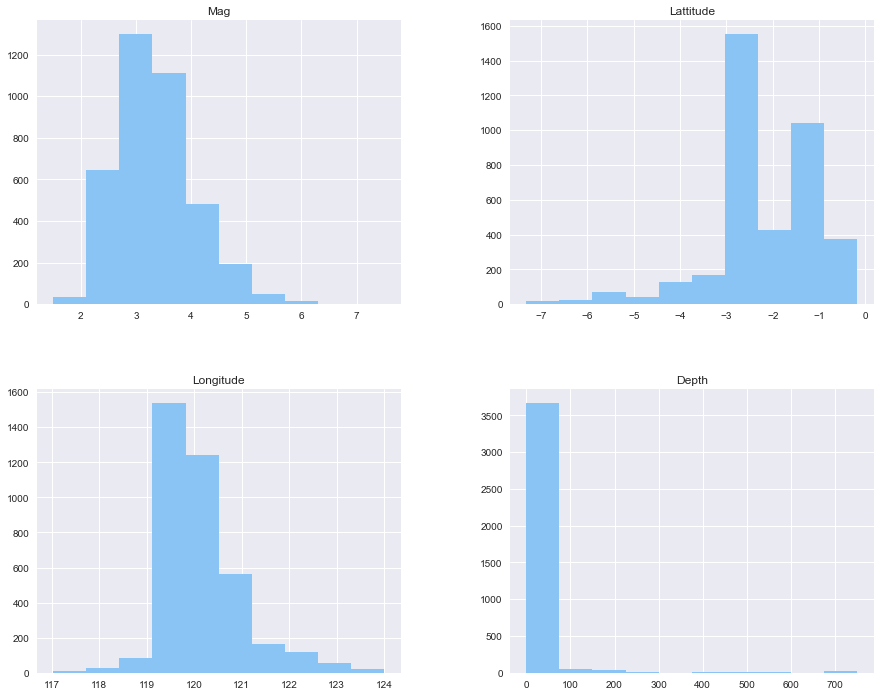

In [14]:
plt.style.use('seaborn')
df[num_vars].hist(figsize = (15,12), color='#89C4F4')
plt.show()

## **Magnitude of Earthquakes**

Jenis Gempa Berdasarkan Kekuatan
* Gempa kuat M ≥ 5.0
* Gempa sedang 3.0 < M < 5.0
* Gempa kecil M ≤ 3.0

Jenis Gempa Berdasarkan Kedalaman Hiposenter
* Gempa dangkal (shallow), dengan kedalaman kurang dari 70 km.
* Gempa menengah (intermediate), dengan kedalaman lebih besar dari 70 km dan kurang dari 300 km.
* Gempa dalam (deep), dengan kedalaman lebih dari 300 km.

In [15]:
def magnitude(x):
    if x >= 5.0:
        result = 'Gempa Kuat'
    elif x < 5.0  and x > 3.0:
        result = 'Gempa Sedang'
    else:
        result = 'Gempa Kecil'
    return result

def depth(x):
    if x >= 300:
        result = 'Gempa Dalam'
    elif x < 300  and x > 70:
        result = 'Gempa Menengah'
    else:
        result = 'Gempa Dangkal'
    return result

In [16]:
df['Jenis Gempa'] = [magnitude(i) for i in df['Mag']]
df['Jenis Kedalaman'] = [depth(i) for i in df['Depth']]

In [17]:
df.head()

,Date,Mag,Lattitude,Longitude,Depth,KETERANGAN_LOKASI,Patahan,Jenis Gempa,Jenis Kedalaman
0,2015-01-01,3.4,-1.99,120.41,17,47 km BaratLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
1,2015-01-01,3.3,-1.88,120.30,24,60 km Tenggara Kulawi,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
2,2015-02-01,4.8,-2.22,120.87,17,34 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
3,2015-02-01,4.5,-2.21,120.87,12,35 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
4,2015-02-01,4.1,-2.17,120.77,10,29 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal


In [25]:
df_jenisGempa = df.groupby(['Patahan', 'Jenis Gempa'])[['Jenis Gempa']].count().rename(columns={'Jenis Gempa' : 'Total'}).reset_index()
df_jenisKedalaman = df.groupby(['Patahan', 'Jenis Kedalaman'])[['Jenis Kedalaman']].count().rename(columns={'Jenis Kedalaman' : 'Total'}).reset_index()

In [27]:
stackbar_h(df_jenisGempa, y='Patahan', x='Total',
           hover_data=['Jenis Gempa', 'Total'], color='Jenis Gempa',
           labels={'Jenis Gempa':'Jenis Gempa'}, width=1000, height=500,
           title="Eartquake's Magnitude each Faults Area",
           xaxis='Total Earthquakes',
           yaxis='Faults',
           )

In [28]:
stackbar_h(df_jenisKedalaman, y='Patahan', x='Total',
           hover_data=['Jenis Kedalaman', 'Total'], color='Jenis Kedalaman',
           labels={'Jenis Kedalaman':'Jenis Kedalaman'}, width=1000, height=500,
           title="Eartquake's Depth each Faults Area",
           xaxis='Total Earthquakes',
           yaxis='Faults',
           )

***
**Observation :**

- Berdasarkan 

***

***
# **Modeling & Evaluation**

***

In [29]:
df

,Date,Mag,Lattitude,Longitude,Depth,KETERANGAN_LOKASI,Patahan,Jenis Gempa,Jenis Kedalaman
0,2015-01-01,3.4,-1.99,120.41,17,47 km BaratLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
1,2015-01-01,3.3,-1.88,120.30,24,60 km Tenggara Kulawi,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
2,2015-02-01,4.8,-2.22,120.87,17,34 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
3,2015-02-01,4.5,-2.21,120.87,12,35 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
4,2015-02-01,4.1,-2.17,120.77,10,29 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
...,...,...,...,...,...,...,...,...,...
3830,2019-12-30,2.4,-2.86,119.52,11,18 km TimurLaut Pana,Patahan Saddang,Gempa Kecil,Gempa Dangkal
3831,2019-12-30,2.3,-2.85,119.48,10,19 km BaratLaut Pana,Patahan Saddang,Gempa Kecil,Gempa Dangkal
3832,2019-12-30,3.3,-1.50,120.07,10,11 km Tenggara Kulawi,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
3833,2019-12-31,3.2,-2.37,121.40,10,15 km Tenggara Lembo,Patahan Matano,Gempa Sedang,Gempa Dangkal


In [57]:
# Define X & y

X_train = df[['Lattitude', 'Longitude']]
y_train = df[['Patahan']]
X_test = df_test[['Lattitude', 'Longitude']]
y_test = df_test[['Patahan']]


### **Choose Factor K**

In [61]:
k = range(1,30,1)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)

  y_predict_train = knn.predict(X_train)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

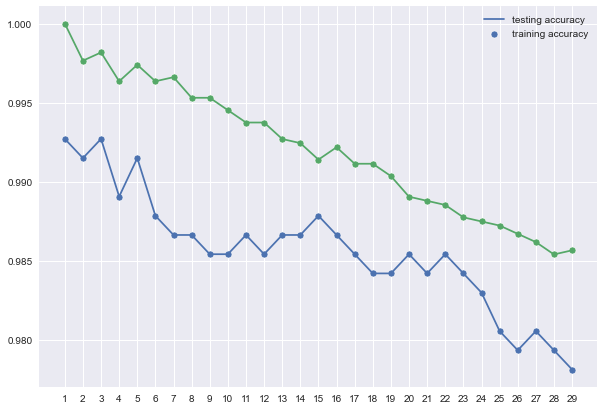

In [62]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k));

In [63]:
print('best k:', best_k)
print('accuracy:', score)

best k: 1
accuracy: 0.9927007299270073


In [64]:
list_k = pd.DataFrame(data=[k, testing_accuracies, training_accuracies]).T
list_k.rename(columns={0:'K', 1:'Test_acc', 2:'Train_acc'}, inplace=True)
list_k['difference'] = list_k['Train_acc'] - list_k['Test_acc']
list_k

,K,Test_acc,Train_acc,difference
0,1.0,0.992701,1.000000,0.007299
1,2.0,0.991484,0.997651,0.006167
2,3.0,0.992701,0.998173,0.005473
3,4.0,0.989051,0.996347,0.007295
4,5.0,0.991484,0.997390,0.005906
5,6.0,0.987835,0.996347,0.008512
6,7.0,0.986618,0.996608,0.009990
7,8.0,0.986618,0.995303,0.008685
8,9.0,0.985401,0.995303,0.009901
9,10.0,0.985401,0.994520,0.009118


***
**Observations :**
* Berdasarkan hasil diatas, kita dapat memilih nilai K yang lebih sesuai dan yang terbaik untuk model ini adalah K=3.
***

### **Evaluation : K-Fold Cross Validation**

In [168]:
eval = pd.DataFrame()

for i in range(1,30,2):
    kf = KFold(n_splits=10) 
    estimator = KNeighborsClassifier(n_neighbors = i)
    cross_val = cross_validate(estimator, X_train, y_train, cv=kf)
    hasil = pd.DataFrame(cross_val).describe().iloc[[1]].rename(index={'mean':i}, columns={'fit_time': 'mean_fit_time', 'score_time':'mean_score_time', 'test_score':'mean_test_score'})
    eval = eval.append(hasil)

In [169]:
eval

,mean_fit_time,mean_score_time,mean_test_score
1,0.004048,0.006924,0.992959
3,0.003930,0.006922,0.993741
5,0.003559,0.006900,0.991916
7,0.003545,0.007040,0.991653
9,0.003885,0.007637,0.989827
11,0.003626,0.007303,0.990611
13,0.003705,0.007591,0.989566
15,0.003870,0.007773,0.988000
17,0.003580,0.007509,0.987480
19,0.003679,0.007701,0.985393


Hasil yang diperoleh diatas menunjukkan bahwa hasil evaluasi model menggunakan 10-Fold Cross Validation dengan K=3 untuk K-Nearest Neighbors memberikan nilai rata2 hasil evaluasi yang lebih tinggi jika dibandingkan dengan nilai K lainnya. 

In [170]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [171]:
#Classification Report
print(classification_report(y_test, y_pred, target_names=['Sesar Lawanopo', 'Sesar Matano', 'Sesar Palu Koro', 'Sesar Saddang', 'Sesar Walanae'], digits=4))

                 precision    recall  f1-score   support

 Sesar Lawanopo     1.0000    1.0000    1.0000        31
   Sesar Matano     0.9957    0.9913    0.9935       231
Sesar Palu Koro     0.9875    0.9968    0.9921       316
  Sesar Saddang     1.0000    0.9846    0.9922       195
  Sesar Walanae     0.9800    1.0000    0.9899        49

       accuracy                         0.9927       822
      macro avg     0.9926    0.9946    0.9936       822
   weighted avg     0.9928    0.9927    0.9927       822



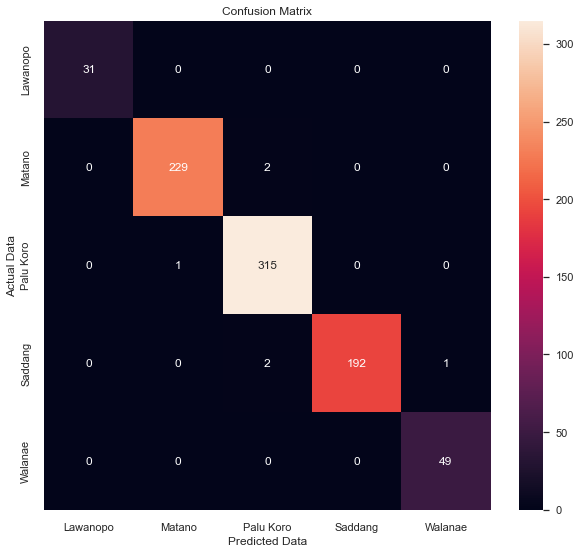

In [177]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Data')
ax.set_ylabel('Actual Data');
ax.xaxis.set_ticklabels(['Lawanopo', 'Matano', 'Palu Koro', 'Saddang', 'Walanae'])
ax.yaxis.set_ticklabels(['Lawanopo', 'Matano', 'Palu Koro', 'Saddang', 'Walanae'])
sns.set(rc={'figure.figsize':(9,9)})
plt.show()

In [180]:
df_test

,Date,Mag,Lattitude,Longitude,Depth,KETERANGAN_LOKASI,Patahan
0,16-01-2020,4.2,-5.72,120.63,10,51 km TimurLaut Selayar,Patahan Walanae
1,16-01-2020,2.3,-2.82,119.42,10,19 km TimurLaut Mamasa,Patahan Saddang
2,17-01-2020,3.2,-5.68,120.68,10,55 km Tenggara Bulukumba,Patahan Walanae
3,17-01-2020,3.1,-2.84,119.43,10,18 km TimurLaut Mamasa,Patahan Saddang
4,17-01-2020,2.8,-1.71,119.97,60,30 km BaratDaya Kulawi,Patahan Palu Koro
...,...,...,...,...,...,...,...
817,29-12-2020,3.0,-2.51,120.71,10,20 km Tenggara Mangkutana,Patahan Matano
818,30-12-2020,2.5,-2.17,121.20,10,17 km BaratLaut Lembo,Patahan Matano
819,30-12-2020,3.3,-1.37,120.47,10,55 km TimurLaut Kulawi,Patahan Palu Koro
820,30-12-2020,2.9,-1.36,119.64,10,36 km BaratDaya Sigi,Patahan Palu Koro


In [181]:
df

,Date,Mag,Lattitude,Longitude,Depth,KETERANGAN_LOKASI,Patahan,Jenis Gempa,Jenis Kedalaman
0,2015-01-01,3.4,-1.99,120.41,17,47 km BaratLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
1,2015-01-01,3.3,-1.88,120.30,24,60 km Tenggara Kulawi,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
2,2015-02-01,4.8,-2.22,120.87,17,34 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
3,2015-02-01,4.5,-2.21,120.87,12,35 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
4,2015-02-01,4.1,-2.17,120.77,10,29 km TimurLaut Mangkutana,Patahan Matano,Gempa Sedang,Gempa Dangkal
...,...,...,...,...,...,...,...,...,...
3830,2019-12-30,2.4,-2.86,119.52,11,18 km TimurLaut Pana,Patahan Saddang,Gempa Kecil,Gempa Dangkal
3831,2019-12-30,2.3,-2.85,119.48,10,19 km BaratLaut Pana,Patahan Saddang,Gempa Kecil,Gempa Dangkal
3832,2019-12-30,3.3,-1.50,120.07,10,11 km Tenggara Kulawi,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
3833,2019-12-31,3.2,-2.37,121.40,10,15 km Tenggara Lembo,Patahan Matano,Gempa Sedang,Gempa Dangkal
